Arrays in the file: ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']
train_images:
[[[ 92 108 117 ...   5   8   6]
  [129 138 141 ...   4   2   3]
  [141 146 148 ...   0   0   0]
  ...
  [168 180 192 ... 119 115 126]
  [173 184 195 ... 153 139 132]
  [173 185 198 ... 168 154 139]]

 [[115 118 117 ... 123 115 104]
  [130 137 140 ... 146 135 121]
  [134 151 167 ... 152 138 123]
  ...
  [176 180 187 ... 169 151 142]
  [181 185 192 ... 173 163 158]
  [184 189 195 ... 183 176 169]]

 [[149 146 147 ... 128 141 151]
  [171 153 147 ... 149 159 166]
  [172 166 167 ... 162 170 172]
  ...
  [ 95 133 174 ... 159 118 150]
  [139 166 196 ... 185 147 150]
  [181 184 191 ... 188 169 157]]

 ...

 [[ 86  97 103 ...  53  44  44]
  [ 88 102 116 ...  57  46  46]
  [ 96 106 125 ...  74  60  58]
  ...
  [ 43  58  81 ... 147 139 132]
  [ 90 106 127 ... 148 138 130]
  [132 142 153 ... 145 136 129]]

 [[ 14   0   0 ...  96  95  99]
  [ 66  56  65 ... 119 115 118]
  [ 9

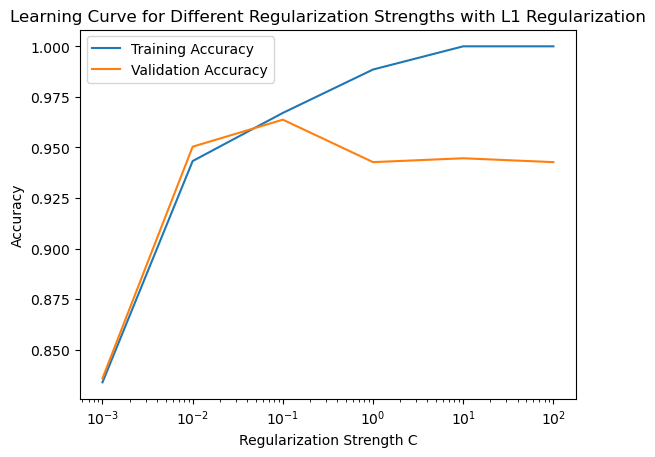

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
import warnings

# Function to load npz file
def load_npz_file(file_path):
    try:
        data = np.load(file_path)
        print("Arrays in the file:", list(data.keys()))
        for array_name in data:
            print(f"{array_name}:")
            print(data[array_name])
        return data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

# Replace with your npz file path
npz_file_path = r"C:\Users\An\pneumoniamnist.npz"  # Update this path

# Load npz file
loaded_data = load_npz_file(npz_file_path)

# Extract arrays from loaded data
train_images, val_images, test_images = loaded_data['train_images'], loaded_data['val_images'], loaded_data['test_images']
train_labels, val_labels, test_labels = loaded_data['train_labels'], loaded_data['val_labels'], loaded_data['test_labels']

# Flatten images
def flatten_images(images):
    return images.reshape(images.shape[0], -1)

X_train, X_val, X_test = flatten_images(train_images), flatten_images(val_images), flatten_images(test_images)
y_train, y_val, y_test = train_labels.flatten(), val_labels.flatten(), test_labels.flatten()

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Set different values of regularization strength C
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
train_accuracies = []
val_accuracies = []

# Suppress the convergence warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train models with different C values using L1 regularization and record accuracies
for C in C_values:
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear')  # L1 regularization
    model.fit(X_train_scaled, y_train)
    
    # Training accuracy
    train_predictions = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Validation accuracy
    val_predictions = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_accuracies.append(val_accuracy)

# Plot the learning curve
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, val_accuracies, label='Validation Accuracy')
plt.xscale('log')  # Use logarithmic scale for C values
plt.xlabel('Regularization Strength C')
plt.ylabel('Accuracy')
plt.title('Learning Curve for Different Regularization Strengths with L1 Regularization')
plt.legend()
plt.show()